In [2]:

import sys
!pip install transformers --user
!pip install sentencepiece --user

     |████████████████████████████████| 2.2MB 8.8MB/s 
     |████████████████████████████████| 3.3MB 21.7MB/s 
     |████████████████████████████████| 870kB 35.5MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.44-cp37-none-any.whl size=886084 sha256=198f1fae7912060408fb303bec41299392fd9e382e0c85598f937be88748b037
  Stored in directory: /root/.cache/pip/wheels/3e/fb/c0/13ab4d63d537658f448366744654323077c4d90069b6512f3c
Successfully built sacremoses
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
     |████████████████████████████████| 1.2MB 8.0MB/s 


In [1]:
# Import libraries

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from transformers import BertTokenizerFast
from transformers import BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import torch
import torch.nn.functional as F
from tqdm.notebook import tqdm
import os
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from tqdm import tqdm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
tokenizer =  BertTokenizerFast.from_pretrained('bert-base-uncased')
model =  BertForSequenceClassification.from_pretrained('bert-base-uncased')


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

## Read in txt Files




In [4]:
os.getcwd()


'/content'

In [5]:
os.listdir()
os.chdir("/content/drive/MyDrive/w266 Final Project Resources")

In [6]:
all_episodes = []
episodes_true = os.listdir("spongebob_bert_text_updated/class_true")
#episodes_false = os.listdir("spongebob_bert_text_updated/class_false")
for ep in episodes_true:
  
  with open("spongebob_bert_text_updated/class_true/" + ep) as file:
    print(ep)
    all_episodes.append(file.read())
# print(len(all_episodes))
# for ep in episodes_false:
#   file = open("spongebob_bert_text_updated/class_false/" + ep)
#   all_episodes.append(file.read())
len(all_episodes)

spongebob_0.txt
spongebob_1.txt
spongebob_3.txt
spongebob_4.txt
spongebob_5.txt
spongebob_2.txt
spongebob_6.txt
spongebob_9.txt
spongebob_8.txt
spongebob_7.txt
spongebob_10.txt
spongebob_11.txt
spongebob_15.txt
spongebob_12.txt
spongebob_16.txt
spongebob_14.txt
spongebob_13.txt
spongebob_17.txt
spongebob_19.txt
spongebob_20.txt
spongebob_18.txt
spongebob_24.txt
spongebob_25.txt
spongebob_26.txt
spongebob_23.txt
spongebob_21.txt
spongebob_22.txt
spongebob_28.txt
spongebob_29.txt
spongebob_27.txt
spongebob_32.txt
spongebob_30.txt
spongebob_36.txt
spongebob_33.txt
spongebob_34.txt
spongebob_35.txt
spongebob_31.txt
spongebob_38.txt
spongebob_39.txt
spongebob_37.txt
spongebob_40.txt
spongebob_41.txt
spongebob_44.txt
spongebob_43.txt
spongebob_45.txt
spongebob_42.txt
spongebob_46.txt
spongebob_48.txt
spongebob_47.txt
spongebob_49.txt
spongebob_50.txt
spongebob_51.txt
spongebob_55.txt
spongebob_53.txt
spongebob_54.txt
spongebob_52.txt
spongebob_56.txt
spongebob_57.txt
spongebob_59.txt
spongeb

594

## Take Ratings and Turn into Y-variable



In [7]:
ratings =[]
for i in range(len(all_episodes)):
  rating = re.search(r'<\d>',all_episodes[i])
  all_episodes[i] = re.sub(r'<\d>','',all_episodes[i])
  ratings.append(int(rating.group(0)[1]))
all_episodes[0]

'<Start Ep>  \n[A humanized pink starfish in a suit walks up and knocks on Patrick\'s rock.]\nPatrick: Yeah?\nStarfish: Good day, sir. I am...\nPatrick: [gasp] I know exactly who you are! [closes rock]\nSpongeBob: Ah, there\'s nothing like spending quality time with my Gare-Gare.\nLady on TV: Jason, I have to be honest. There\'s someone else. [grabs an elderly fish]\nMan on TV: Grandpa!\nPatrick: [pokes head out of TV] SpongeBob, help! He\'s onto me! I don\'t have much time! [pants. Makes a fire in SpongeBob\'s living room and burns some of his books]\nSpongeBob: Patrick, what are you doing?\nPatrick: I have to get rid of these books! [shows \'HOW TO READ\' book]\nSpongeBob: Why?\nPatrick: I\'ll show you why. [shoves SpongeBob\'s face into his window looking at the pink starfish] See him? He\'s from the library. He knows about my overdue books. [SpongeBob gasps] Uh-huh. Which means I\'m gonna get thrown into the big house. And you know what that means...\nSpongeBob: Small portion meals

## Train Test Split and Tokenize

In [8]:
train_texts, val_texts, train_labels,val_labels = train_test_split(all_episodes,ratings, test_size =.2)
  

In [9]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings = tokenizer(val_texts, truncation=True, padding=True)
all_encodings = tokenizer(all_episodes, truncation=True, padding=True )

## Convert into PyTorch Objects



In [10]:
class SpongebobDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [11]:

train_dataset = SpongebobDataset(train_encodings, train_labels)
val_dataset = SpongebobDataset(val_encodings, val_labels)
all_dataset = SpongebobDataset(all_encodings,ratings)

In [12]:

torch.cuda.empty_cache()

In [16]:
net = model

## Finetune BERT model for IMDB Rating Classification



In [15]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
net.to(device)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset ,batch_size = 16)
criterion = nn.BCELoss()
optim = AdamW(net.parameters(), lr=5e-5)
losses = []
losses_val = []
pred = np.array([])
i =0
for ep in range(15):
  print('Epoch: ',ep)
  pred = np.array([])
  label = np.array([])
  with tqdm(total = len(train_loader)) as pbar:
    batch_losses = []
    for batch in train_loader:
      net.train()
      pbar.update(1)
      optim.zero_grad()
      input_ids = batch['input_ids'].to(device)
      attention_mask = batch['attention_mask'].to(device)
      labels = batch['labels'].to(device)
      outputs = net(input_ids, attention_mask=attention_mask,labels= labels)
      loss =outputs[0]
      loss.backward()

      print('loss: ',torch.Tensor.cpu(loss).item())
      optim.step()
      pred= np.append(pred,(torch.argmax(torch.softmax(torch.Tensor.cpu(outputs.logits).detach(),dim=-1),dim=1)))
      label = np.append(label,torch.Tensor.cpu(labels).detach())
      batch_losses.append(torch.Tensor.cpu(loss).item())

    net.eval()
    val_losses = []
    val_label = np.array([])
    val_pred = np.array([])
    for v in val_loader:
      val_input_ids = v['input_ids'].to(device)
      val_attention_mask =  v['attention_mask'].to(device)
      val_labels = v['labels'].to(device)
      with torch.no_grad():
        val_output = net(val_input_ids,attention_mask=val_attention_mask,labels= val_labels)

        val_loss =val_output[0]
        val_losses = np.append(val_losses,torch.Tensor.cpu(val_loss).item())
        val_label = np.append(val_label,torch.Tensor.cpu(val_labels).detach())
        val_pred= np.append(val_pred,(torch.argmax(torch.softmax(torch.Tensor.cpu(val_output.logits).detach(),dim=1),dim=1)))
    print('val loss: ', np.mean(val_losses))
      
  
  losses.append(np.mean(batch_losses))
  losses_val.append( np.mean(val_losses))
  print('Training Accuracy:',accuracy_score(label,pred))
  print('Validation Accuracy:',accuracy_score(val_label, val_pred))
net


  0%|          | 0/30 [00:00<?, ?it/s]

Epoch:  0


  7%|▋         | 2/30 [00:01<00:14,  1.95it/s]

loss:  0.894601583480835


 10%|█         | 3/30 [00:01<00:16,  1.62it/s]

loss:  0.7753076553344727


 13%|█▎        | 4/30 [00:02<00:17,  1.46it/s]

loss:  0.8205918669700623


 17%|█▋        | 5/30 [00:03<00:18,  1.36it/s]

loss:  0.9036420583724976


 20%|██        | 6/30 [00:04<00:18,  1.29it/s]

loss:  0.7569212317466736


 23%|██▎       | 7/30 [00:05<00:18,  1.25it/s]

loss:  0.6874670386314392


 27%|██▋       | 8/30 [00:06<00:17,  1.23it/s]

loss:  0.7962466478347778


 30%|███       | 9/30 [00:07<00:17,  1.21it/s]

loss:  0.7540222406387329


 33%|███▎      | 10/30 [00:07<00:16,  1.20it/s]

loss:  0.7161553502082825


 37%|███▋      | 11/30 [00:08<00:15,  1.19it/s]

loss:  0.673518717288971


 40%|████      | 12/30 [00:09<00:15,  1.19it/s]

loss:  0.6571304202079773


 43%|████▎     | 13/30 [00:10<00:14,  1.19it/s]

loss:  0.7478244304656982


 47%|████▋     | 14/30 [00:11<00:13,  1.18it/s]

loss:  0.7663993835449219


 50%|█████     | 15/30 [00:12<00:12,  1.18it/s]

loss:  0.7740561962127686


 53%|█████▎    | 16/30 [00:12<00:11,  1.18it/s]

loss:  0.7673612833023071


 57%|█████▋    | 17/30 [00:13<00:11,  1.18it/s]

loss:  0.7810398936271667


 60%|██████    | 18/30 [00:14<00:10,  1.18it/s]

loss:  0.679318368434906


 63%|██████▎   | 19/30 [00:15<00:09,  1.18it/s]

loss:  0.6981694102287292


 67%|██████▋   | 20/30 [00:16<00:08,  1.17it/s]

loss:  0.711882472038269


 70%|███████   | 21/30 [00:17<00:07,  1.18it/s]

loss:  0.6877609491348267


 73%|███████▎  | 22/30 [00:18<00:06,  1.17it/s]

loss:  0.724121630191803


 77%|███████▋  | 23/30 [00:18<00:05,  1.17it/s]

loss:  0.8022226095199585


 80%|████████  | 24/30 [00:19<00:05,  1.17it/s]

loss:  0.7166681885719299


 83%|████████▎ | 25/30 [00:20<00:04,  1.18it/s]

loss:  0.6935432553291321


 87%|████████▋ | 26/30 [00:21<00:03,  1.18it/s]

loss:  0.6900774240493774


 90%|█████████ | 27/30 [00:22<00:02,  1.18it/s]

loss:  0.6978623867034912


 93%|█████████▎| 28/30 [00:23<00:01,  1.18it/s]

loss:  0.6974156498908997


 97%|█████████▋| 29/30 [00:24<00:00,  1.18it/s]

loss:  0.7297521233558655


100%|██████████| 30/30 [00:24<00:00,  1.18it/s]

loss:  0.7007555961608887
loss:  0.6720442175865173


  0%|          | 0/30 [00:00<?, ?it/s]

val loss:  0.7060724496841431
Training Accuracy: 0.4610526315789474
Validation Accuracy: 0.47058823529411764
Epoch:  1


  7%|▋         | 2/30 [00:00<00:11,  2.34it/s]

loss:  0.6352503895759583


 10%|█         | 3/30 [00:01<00:14,  1.81it/s]

loss:  0.6520273089408875


 13%|█▎        | 4/30 [00:02<00:16,  1.55it/s]

loss:  0.6201680898666382


 17%|█▋        | 5/30 [00:03<00:17,  1.42it/s]

loss:  0.6248074173927307


 20%|██        | 6/30 [00:04<00:18,  1.33it/s]

loss:  0.7721827030181885


 23%|██▎       | 7/30 [00:05<00:17,  1.28it/s]

loss:  0.7301414012908936


 27%|██▋       | 8/30 [00:05<00:17,  1.25it/s]

loss:  0.7109745740890503


 30%|███       | 9/30 [00:06<00:17,  1.23it/s]

loss:  0.7770301103591919


 33%|███▎      | 10/30 [00:07<00:16,  1.21it/s]

loss:  0.6461153626441956


 37%|███▋      | 11/30 [00:08<00:15,  1.20it/s]

loss:  0.6889736652374268


 40%|████      | 12/30 [00:09<00:15,  1.19it/s]

loss:  0.7158801555633545


 43%|████▎     | 13/30 [00:10<00:14,  1.18it/s]

loss:  0.7545572519302368


 47%|████▋     | 14/30 [00:11<00:13,  1.18it/s]

loss:  0.7522320747375488


 50%|█████     | 15/30 [00:11<00:12,  1.18it/s]

loss:  0.7438158392906189


 53%|█████▎    | 16/30 [00:12<00:11,  1.18it/s]

loss:  0.7350665330886841


 57%|█████▋    | 17/30 [00:13<00:11,  1.18it/s]

loss:  0.6439669728279114


 60%|██████    | 18/30 [00:14<00:10,  1.17it/s]

loss:  0.7603361010551453


 63%|██████▎   | 19/30 [00:15<00:09,  1.17it/s]

loss:  0.6768158674240112


 67%|██████▋   | 20/30 [00:16<00:08,  1.18it/s]

loss:  0.7656518816947937


 70%|███████   | 21/30 [00:17<00:07,  1.18it/s]

loss:  0.7361924648284912


 73%|███████▎  | 22/30 [00:17<00:06,  1.18it/s]

loss:  0.7125557661056519


 77%|███████▋  | 23/30 [00:18<00:05,  1.18it/s]

loss:  0.7184645533561707


 80%|████████  | 24/30 [00:19<00:05,  1.18it/s]

loss:  0.7075542211532593


 83%|████████▎ | 25/30 [00:20<00:04,  1.18it/s]

loss:  0.6996294856071472


 87%|████████▋ | 26/30 [00:21<00:03,  1.18it/s]

loss:  0.7158750891685486


 90%|█████████ | 27/30 [00:22<00:02,  1.18it/s]

loss:  0.6501443982124329


 93%|█████████▎| 28/30 [00:22<00:01,  1.18it/s]

loss:  0.6945032477378845


 97%|█████████▋| 29/30 [00:23<00:00,  1.18it/s]

loss:  0.6778564453125


100%|██████████| 30/30 [00:24<00:00,  1.18it/s]

loss:  0.6869171857833862
loss:  0.7087109088897705


  0%|          | 0/30 [00:00<?, ?it/s]

val loss:  0.7032271325588226
Training Accuracy: 0.5242105263157895
Validation Accuracy: 0.47058823529411764
Epoch:  2


  7%|▋         | 2/30 [00:00<00:12,  2.33it/s]

loss:  0.6976025104522705


 10%|█         | 3/30 [00:01<00:15,  1.80it/s]

loss:  0.6667425036430359


 13%|█▎        | 4/30 [00:02<00:16,  1.55it/s]

loss:  0.6642497181892395


 17%|█▋        | 5/30 [00:03<00:17,  1.41it/s]

loss:  0.7846981883049011


 20%|██        | 6/30 [00:04<00:18,  1.33it/s]

loss:  0.7781131863594055


 23%|██▎       | 7/30 [00:05<00:18,  1.28it/s]

loss:  0.6578904986381531


 27%|██▋       | 8/30 [00:05<00:17,  1.25it/s]

loss:  0.7198459506034851


 30%|███       | 9/30 [00:06<00:17,  1.22it/s]

loss:  0.7162421345710754


 33%|███▎      | 10/30 [00:07<00:16,  1.21it/s]

loss:  0.6733283996582031


 33%|███▎      | 10/30 [00:08<00:17,  1.17it/s]


KeyboardInterrupt: ignored

## Train and Validation Loss

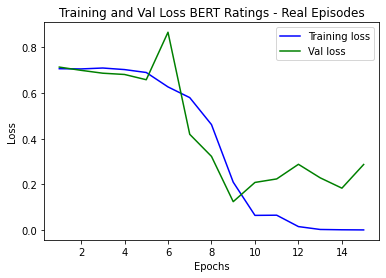

In [15]:
loss_train = losses
loss_val = losses_val
epochs = range(1,16)
plt.plot(epochs, loss_train, 'b', label='Training loss')
plt.plot(epochs, loss_val, 'g', label='Val loss')
plt.title('Training and Val Loss BERT Ratings - Real Episodes')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('Sentiment_Loss_Real_Episodes')
plt.show()


## Test Evaluation

In [19]:

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')


train_loader = DataLoader(all_dataset, batch_size=16, shuffle=True)

optim = AdamW(model.parameters(), lr=5e-5)
pred= np.array([])

for batch in train_loader:
    with torch.no_grad():
      net.eval()
      input_ids = batch['input_ids'].to(device)
      attention_mask = batch['attention_mask'].to(device)
      labels = batch['labels'].to(device)
      outputs = net(input_ids, attention_mask=attention_mask)
        
      pred= np.append(pred,(torch.argmax(torch.softmax(torch.Tensor.cpu(outputs.logits).detach(),dim=1),dim=1)))
print(accuracy_score(ratings,pred))
 
print(classification_report(ratings,pred))


0.4511784511784512
              precision    recall  f1-score   support

           0       0.46      0.46      0.46       302
           1       0.44      0.45      0.44       292

    accuracy                           0.45       594
   macro avg       0.45      0.45      0.45       594
weighted avg       0.45      0.45      0.45       594

